<a href="https://colab.research.google.com/github/Tankasala25/PyTorch/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform=transforms.ToTensor()

In [4]:

train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.5MB/s]


In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Text(0.5, 1.0, 'Label: 7')

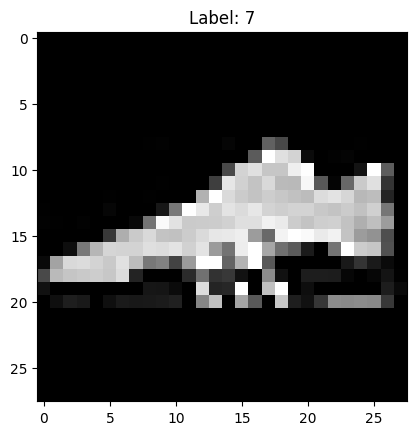

In [7]:
import random

idx=random.randint(0,len(train_data)-1)
image,label=train_data[idx]
plt.imshow(image.squeeze(),cmap='gray',interpolation='nearest')
plt.title(f"Label: {label}")


In [8]:
type(image),type(label)

(torch.Tensor, int)

In [9]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=32,shuffle=True)


In [11]:
images,labels=next(iter(train_loader))

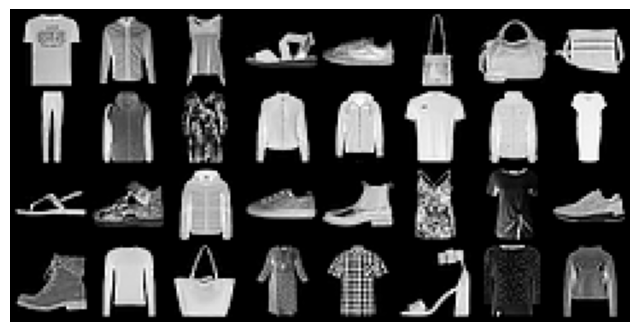

In [12]:
grid=make_grid(images,nrow=8)
plt.figure(figsize=(8,8))

plt.imshow(grid.permute(1,2,0))
plt.axis('off')
plt.show()

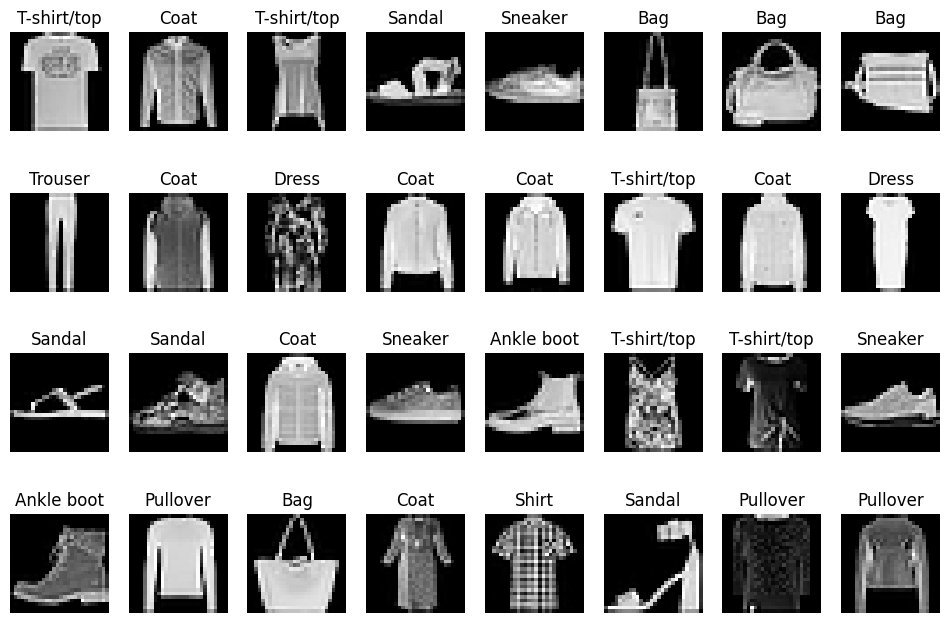

In [13]:
plt.figure(figsize=(12,8))

for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i].squeeze(),cmap='gray')
  plt.title(f"{train_data.classes[labels[i].item()]}")
  plt.axis(False)


plt.show()


In [14]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules.pooling import MaxPool2d
from torch.nn.modules.conv import Conv2d
class FashionMNIST_CNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.fc1= nn.Linear(32*7*7,128)
    self.fc2=nn.Linear(128,10)

  def forward(self,X):
    X=self.conv_block1(X)
    X=self.conv_block2(X)
    X=torch.flatten(X, start_dim=1)
    X=F.relu(self.fc1(X))
    X=self.fc2(X)
    return X



In [15]:
model=FashionMNIST_CNN()

In [16]:
model

FashionMNIST_CNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [17]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [18]:
epochs=10

for epoch in range(epochs):
  model.train()

  running_loss=0.0
  correct=0.0
  total=0.0

  for images,labels in train_loader:

    y_pred=model(images)

    l=loss(y_pred,labels)

    optimizer.zero_grad()

    l.backward()

    optimizer.step()

    running_loss += l.item() * images.size(0)
    preds=y_pred.argmax(dim=1)
    correct+=(preds==labels).sum().item()
    total+=labels.size(0)

  epoch_loss=running_loss/total
  epoch_acc = correct/total
  print(f"Epoch [{epoch+1}/{epochs}]  Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")


Epoch [1/10]  Loss: 0.4690  Acc: 0.8267
Epoch [2/10]  Loss: 0.2882  Acc: 0.8939
Epoch [3/10]  Loss: 0.2376  Acc: 0.9124
Epoch [4/10]  Loss: 0.2081  Acc: 0.9234
Epoch [5/10]  Loss: 0.1840  Acc: 0.9327
Epoch [6/10]  Loss: 0.1639  Acc: 0.9399
Epoch [7/10]  Loss: 0.1445  Acc: 0.9465
Epoch [8/10]  Loss: 0.1276  Acc: 0.9528
Epoch [9/10]  Loss: 0.1130  Acc: 0.9584
Epoch [10/10]  Loss: 0.0992  Acc: 0.9631


In [22]:
model.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
  for images, labels in test_loader:

    y_pred = model(images)

    l=loss(y_pred, labels)

    test_running_loss+= l.item() * images.size(0)

    preds=y_pred.argmax(dim=1)
    test_correct+= (preds==labels).sum().item()
    test_total+=labels.size(0)

wrong_predictions = test_total - test_correct
print(f"correct predictions from test_data:{test_correct}")
print(f"wrong predictions from test_data:{wrong_predictions}")
test_loss=test_running_loss/test_total
test_acc=test_correct/test_total

print(f"Test Loss: {test_loss:.4f}  Test Acc: {test_acc:.4f}")

correct predictions from test_data:9170
wrong predictions from test_data:830
Test Loss: 0.2766  Test Acc: 0.9170


torch.Size([32, 10])
3
tensor([ 2, 18, 26])


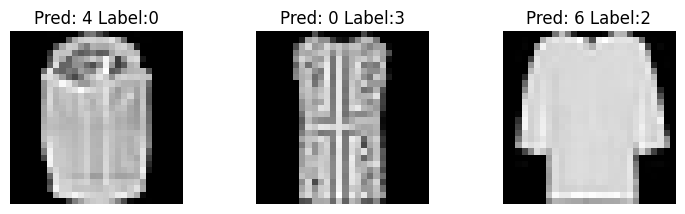

In [21]:
# showing 12 images of wrong_predictions
images , labels= next(iter(test_loader))
outputs=model(images)
preds=outputs.argmax(dim=1)

wrong_predictions = (preds!=labels)
wrong_indices = torch.where(wrong_predictions)[0]

plt.figure(figsize=(10,6))
print(outputs.shape)
print(wrong_predictions.sum().item())
print(wrong_indices)
for i, idx in enumerate(wrong_indices[:12]):
  plt.subplot(3,4,i+1)
  plt.imshow(images[idx].squeeze(),cmap='gray')
  plt.title(f"Pred: {preds[idx].item()} Label:{labels[idx].item()}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
torch.save(obj=model.state_dict(),f="fashionmnist_cnn.pth")

In [28]:
model_fashion_cnn=FashionMNIST_CNN()
model_fashion_cnn.load_state_dict(torch.load("fashionmnist_cnn.pth"))

<All keys matched successfully>

In [29]:
model_fashion_cnn.eval()

FashionMNIST_CNN(
  (conv_block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)